<a href="https://www.kaggle.com/code/vamshivardhanemmadi/linear-regression?scriptVersionId=165729331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
t_d = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
t_d.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
t_d.info

<bound method DataFrame.info of     Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22

In [4]:
t_d = t_d.drop('Unnamed: 0', axis=1)
t_d.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0>

In [5]:

x = t_d.iloc[:,:-1]
x


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [6]:
y=t_d.iloc[:,-1:]
y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [7]:
jitter = np.random.uniform(low=-1, high=1, size=len(t_d))
t_d['Jittered_YearsExperience'] = t_d['YearsExperience'] + jitter

# Linear regression

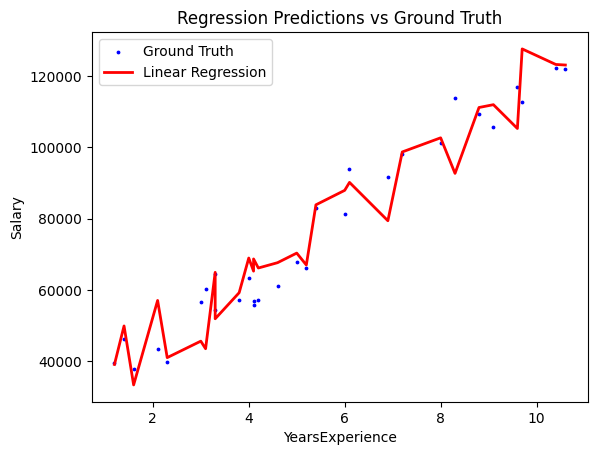

In [8]:

linear_model = LinearRegression()
linear_model.fit(t_d[['Jittered_YearsExperience']], t_d['Salary'])
linear_predictions = linear_model.predict(t_d[['Jittered_YearsExperience']])
r=np.random.normal(0, 5000, len(linear_predictions))
linear_predictions +=r   # Add noise to y-values

plt.scatter(x, y, color='blue', label='Ground Truth',s=3)
plt.plot(x, linear_predictions, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Regression Predictions vs Ground Truth')
plt.legend()
plt.show()

# Ridge Linear regression

Ridge Linear regression with alpha=1

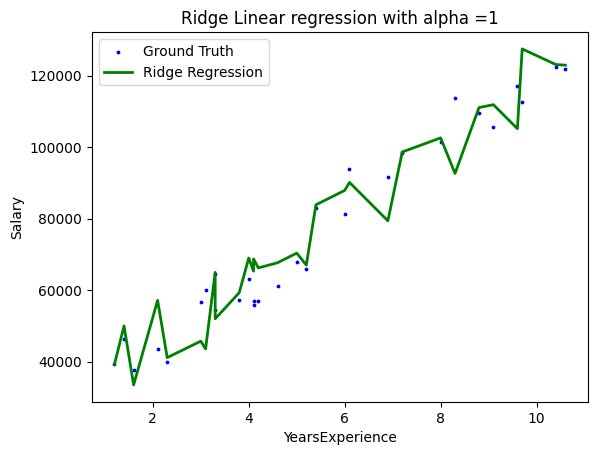

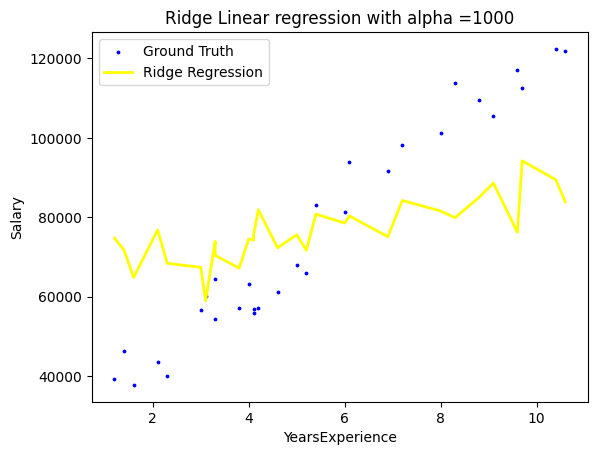

In [9]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(t_d[['Jittered_YearsExperience']], t_d['Salary'])
ridge_predictions = ridge_model.predict(t_d[['Jittered_YearsExperience']])
ridge_predictions += r  # Add noise to y-values

plt.scatter(x, y, color='blue', label='Ground Truth',s=3)
plt.plot(x, ridge_predictions, color='green', linewidth=2, label='Ridge Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Ridge Linear regression with alpha =1')
plt.legend()
plt.show()
ridge_model_a = Ridge(alpha=1000.0)  # You can adjust the alpha parameter
ridge_model_a.fit(t_d[['Jittered_YearsExperience']], t_d['Salary'])
ridge_predictions_a = ridge_model_a.predict(t_d[['Jittered_YearsExperience']])
ridge_predictions_a += r  # Add noise to y-values

plt.scatter(x, y, color='blue', label='Ground Truth',s=3)
plt.plot(x, ridge_predictions_a, color='yellow', linewidth=2, label='Ridge Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Ridge Linear regression with alpha =1000')
plt.legend()
plt.show()

# Lasso  Linear regression

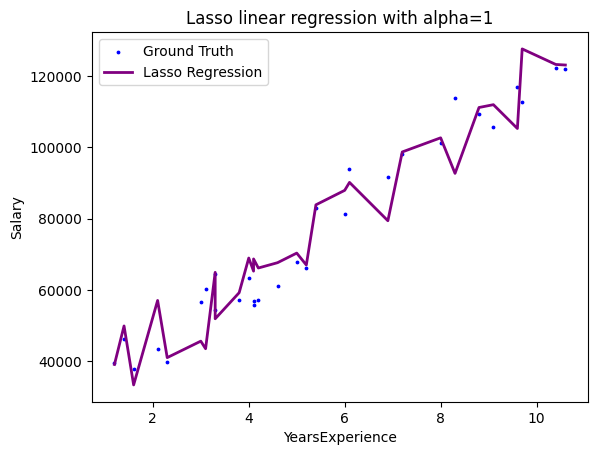

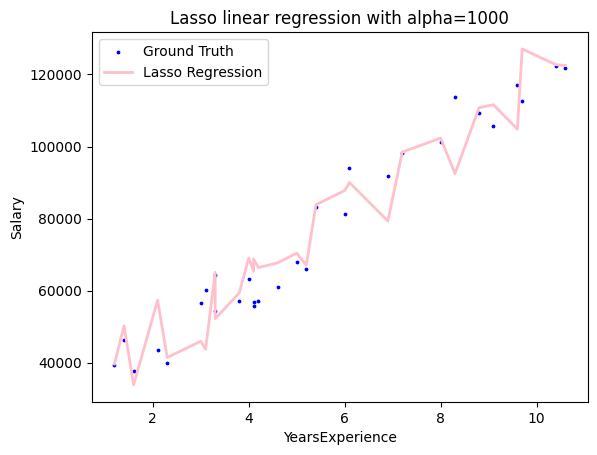

In [10]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(t_d[['Jittered_YearsExperience']], t_d['Salary'])
lasso_predictions = lasso_model.predict(t_d[['Jittered_YearsExperience']])
lasso_predictions += r  # Add noise to y-values

plt.scatter(x, y, color='blue', label='Ground Truth',s=3)
plt.plot(x, lasso_predictions, color='purple', linewidth=2, label='Lasso Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Lasso linear regression with alpha=1')
plt.legend()
plt.show()

lasso_model_a = Lasso(alpha=1000.0)  # You can adjust the alpha parameter
lasso_model_a.fit(t_d[['Jittered_YearsExperience']], t_d['Salary'])
lasso_predictions_a = lasso_model_a.predict(t_d[['Jittered_YearsExperience']])
lasso_predictions_a += r # Add noise to y-values

plt.scatter(x, y, color='blue', label='Ground Truth',s=3)
plt.plot(x, lasso_predictions_a, color='pink', linewidth=2, label='Lasso Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Lasso linear regression with alpha=1000')
plt.legend()
plt.show()

# Graph of all predictions

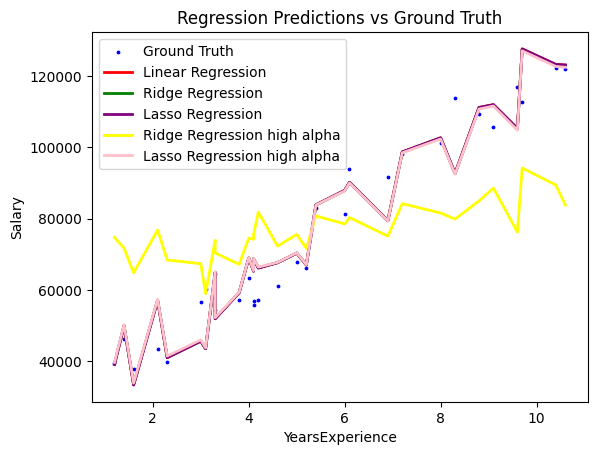

In [11]:
plt.scatter(x, y, color='blue', label='Ground Truth',s=3)
plt.plot(x, linear_predictions, color='red', linewidth=2, label='Linear Regression')
plt.plot(x, ridge_predictions, color='green', linewidth=2, label='Ridge Regression')
plt.plot(x, lasso_predictions, color='purple', linewidth=2, label='Lasso Regression')
plt.plot(x, ridge_predictions_a, color='yellow', linewidth=2, label='Ridge Regression high alpha')
plt.plot(x, lasso_predictions_a, color='pink', linewidth=2, label='Lasso Regression high alpha')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Regression Predictions vs Ground Truth')
plt.legend()
plt.show()

# MSE Mean and Variance

In [12]:
linear_mse = mean_squared_error(t_d['Salary'], linear_predictions)
ridge_mse = mean_squared_error(t_d['Salary'], ridge_predictions)
lasso_mse = mean_squared_error(t_d['Salary'], lasso_predictions)
ridge_mse_a = mean_squared_error(t_d['Salary'], ridge_predictions_a)
lasso_mse_a = mean_squared_error(t_d['Salary'], lasso_predictions_a)
print(f"Linear Regression MSE: {linear_mse:.2f}")
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Lasso Regression MSE: {lasso_mse:.2f}")
print(f"Ridge Regression with alpha=1000 MSE: {ridge_mse:.2f}")
print(f"Lasso Regression with alpha=1000 MSE: {lasso_mse:.2f}")

Linear Regression MSE: 78146429.23
Ridge Regression MSE: 78099878.14
Lasso Regression MSE: 78146235.06
Ridge Regression with alpha=1000 MSE: 78099878.14
Lasso Regression with alpha=1000 MSE: 78146235.06


In [13]:
# Mean and Variance for actual "Salary" values
actual_mean = np.mean(t_d['Salary'])
actual_variance = np.var(t_d['Salary'])

# Mean and Variance for predicted values
linear_predicted_mean = np.mean(linear_predictions)
linear_predicted_variance = np.var(linear_predictions)

ridge_predicted_mean = np.mean(ridge_predictions)
ridge_predicted_variance = np.var(ridge_predictions)

lasso_predicted_mean = np.mean(lasso_predictions)
lasso_predicted_variance = np.var(lasso_predictions)

ridge_predicted_mean_a = np.mean(ridge_predictions_a)
ridge_predicted_variance_a = np.var(ridge_predictions_a)

lasso_predicted_mean_a = np.mean(lasso_predictions_a)
lasso_predicted_variance_a = np.var(lasso_predictions_a)

# Print mean and variance for actual "Salary" values
print(f"Actual Salary Mean: {actual_mean:.2f}")
print(f"Actual Salary Variance: {actual_variance:.2f}\n")

# Print mean and variance for predicted values (Linear Regression)
print(f"Linear Regression Predicted Mean: {linear_predicted_mean:.2f}")
print(f"Linear Regression Predicted Variance: {linear_predicted_variance:.2f}\n")

# Print mean and variance for predicted values (Ridge Regression)
print(f"Ridge Regression Predicted Mean: {ridge_predicted_mean:.2f}")
print(f"Ridge Regression Predicted Variance: {ridge_predicted_variance:.2f}\n")

# Print mean and variance for predicted values (Lasso Regression)
print(f"Lasso Regression Predicted Mean: {lasso_predicted_mean:.2f}")
print(f"Lasso Regression Predicted Variance: {lasso_predicted_variance:.2f}\n")

print(f"Ridge Regression with alpha=1000 Predicted Mean: {ridge_predicted_mean_a:.2f}")
print(f"Ridge Regression with alpha=1000 Predicted Variance: {ridge_predicted_variance_a:.2f}\n")

# Print mean and variance for predicted values (Lasso Regression)
print(f"Lasso Regression with alpha=1000 Predicted Mean: {lasso_predicted_mean_a:.2f}")
print(f"Lasso Regression with alpha=1000 Predicted Variance: {lasso_predicted_variance_a:.2f}")

Actual Salary Mean: 76004.00
Actual Salary Variance: 726499261.73

Linear Regression Predicted Mean: 76574.38
Linear Regression Predicted Variance: 711522854.17

Ridge Regression Predicted Mean: 76574.38
Ridge Regression Predicted Variance: 706550503.24

Lasso Regression Predicted Mean: 76574.38
Lasso Regression Predicted Variance: 711505436.95

Ridge Regression with alpha=1000 Predicted Mean: 76574.38
Ridge Regression with alpha=1000 Predicted Variance: 57371444.19

Lasso Regression with alpha=1000 Predicted Mean: 76574.38
Lasso Regression with alpha=1000 Predicted Variance: 694215708.92
